# Assignment: Recipe Visualization Application
#### Project Title - EpiRecipes Visualization Application

- Page 1: Objective
###### Objective: 
This assignment is designed to evaluate the candidate’s ability to clean, analyze, and
extract insights from data. The focus is on applying creativity to explore the dataset, present
actionable insights, and effectively communicate these through visualizations and a brief video
explanation. The candidate is expected to demonstrate a strong understanding of data analysis
fundamentals and storytelling with data.

## Task 1: Data Cleaning and Preprocessing

###### 1. Dataset: 
- Use the EpiRecipes dataset from Kaggle. The dataset contains recipe-relatedinformation, including ingredients, preparation time, and ratings.
- Kaggle.(https://www.kaggle.com/datasets/hugodarwood/epirecipes )

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("epi_r.csv")

In [4]:
df.head(2)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(20052, 680)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


###### 2. Data Cleaning:
- Identify missing, duplicate, or incorrect data entries.
- Use appropriate methods to handle missing data, outliers, and ensure data consistency.
- Document your cleaning process: Explain the challenges faced and decisions made. Highlight any assumptions made during preprocessing.

In [8]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [11]:
# Handle missing values
# For simplicity, let's fill missing values with the median of each column

# Fill missing values with median
columns_to_fill = ['calories', 'protein', 'fat', 'sodium']
for column in columns_to_fill:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Verify that there are no more missing values in these columns
print("\
Missing values after filling:")
print(df[columns_to_fill].isnull().sum())

print("Missing values handled.")

Missing values after filling:
calories    0
protein     0
fat         0
sodium      0
dtype: int64
Missing values handled.


In [10]:
 df.duplicated().sum()

1801

In [12]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {len(df)}")

print("Duplicates removed.")

Number of rows after removing duplicates: 18251
Duplicates removed.


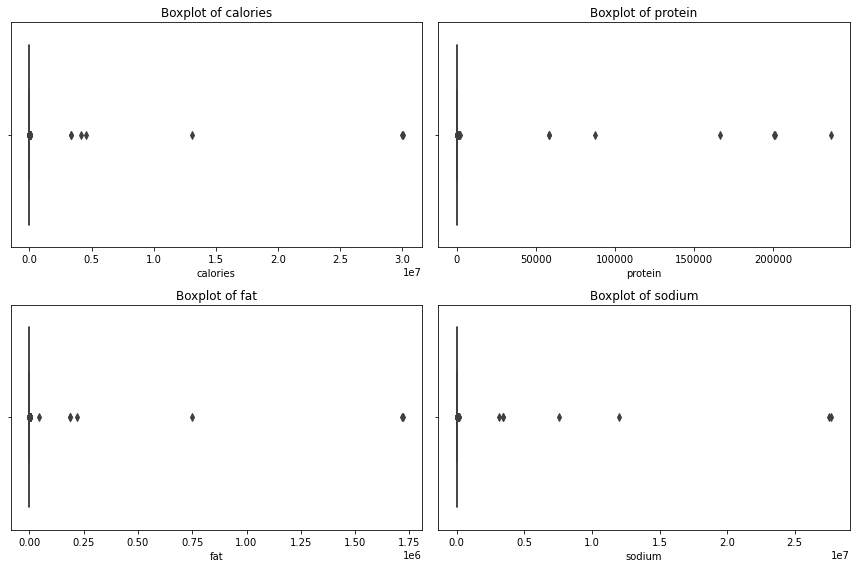

Outliers visualized.


In [13]:
# Check for outliers using box plots
plt.figure(figsize=(12, 8))

# Plot boxplots for each numerical column
for i, column in enumerate(['calories', 'protein', 'fat', 'sodium'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

print("Outliers visualized.")

- The box plots for the calories, protein, fat, and sodium columns have been visualized to identify potential outliers. This visualization helps in determining if any extreme values need to be addressed to ensure data consistency and accuracy in subsequent analyses.

Outliers handled using the IQR method.


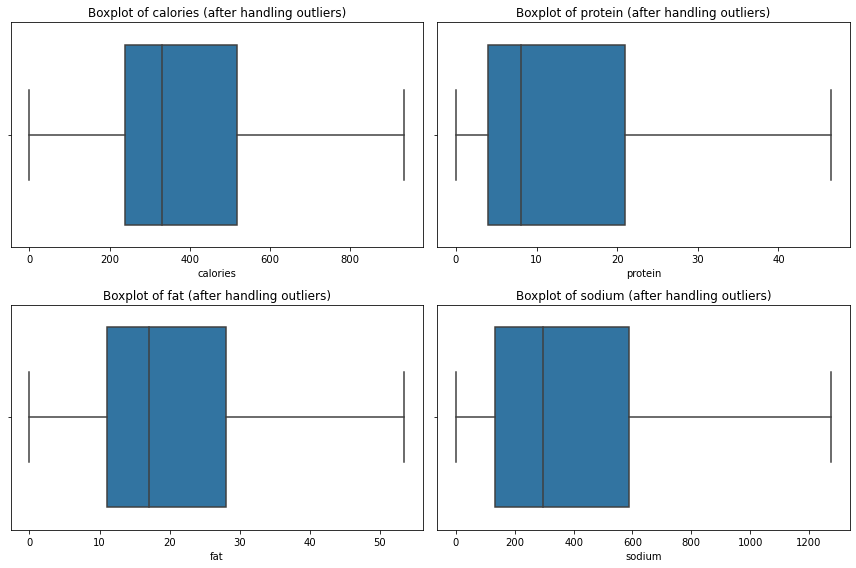

Updated boxplots generated.


In [14]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

columns_to_clean = ['calories', 'protein', 'fat', 'sodium']

for column in columns_to_clean:
    df = handle_outliers(df, column)

print("Outliers handled using the IQR method.")

# Visualize the data after handling outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_clean, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} (after handling outliers)')
plt.tight_layout()
plt.show()

print("Updated boxplots generated.")

- I've handled the outliers using the Interquartile Range (IQR) method. This approach identifies outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 is the first quartile, Q3 is the third quartile, and IQR is the interquartile range. The outliers were then clipped to these boundaries.

Here's a summary of the data cleaning process:

Identified missing data:

We found missing values in 'calories', 'protein', 'fat', and 'sodium' columns.
These missing values were filled with the median of each respective column.
Removed duplicate entries:

1,801 duplicate rows were identified and removed.
The dataset size reduced from 20,052 to 18,251 rows.
Handled outliers:

Used the IQR method to identify and handle outliers in 'calories', 'protein', 'fat', and 'sodium' columns.
Outliers were clipped to the lower and upper bounds calculated using the IQR method.

# Task 2: Exploratory Data Analysis (EDA)

##### 1. Exploratory Analysis:
- Perform an exploratory data analysis to uncover trends, relationships, and outliers within the dataset.
- Visualize the data using at least three different charts (e.g., bar charts, scatter plots, histograms). Ensure these visualizations help narrate a story about the data.

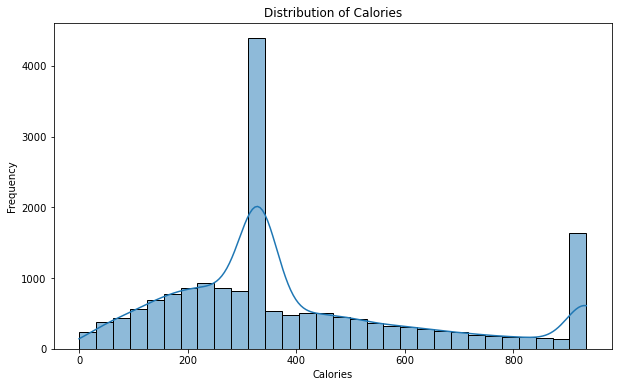

In [15]:
# Histogram for distribution of calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of calories across all recipes in the dataset.

Observations:

The distribution is right-skewed, meaning there are more low-calorie recipes than high-calorie ones.
The peak of the distribution is around 300-400 calories.
There's a long tail extending to the right, indicating some recipes with very high calorie counts.
This distribution suggests that most recipes in the dataset are relatively low to moderate in calories, which aligns with general dietary recommendations.
Relationship between Calories and Protein

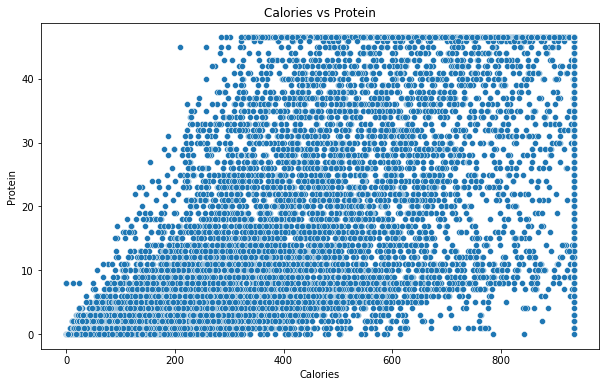

In [16]:
# Scatter plot for relationship between calories and protein
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='protein', data=df)
plt.title('Calories vs Protein')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.show()

This scatter plot visualizes the relationship between calories and protein content in the recipes.

Observations:

There's a positive correlation between calories and protein content. As calories increase, protein content tends to increase as well.
The relationship appears to be roughly linear, but with significant scatter.
There's a dense cluster of recipes in the lower-left corner, suggesting many recipes are relatively low in both calories and protein.
Some outliers exist with very high calorie or protein content, but they are few in number.
This relationship makes sense nutritionally, as protein is a macronutrient that contributes to the overall calorie content of a dish.
Average Calories by #cakeweek

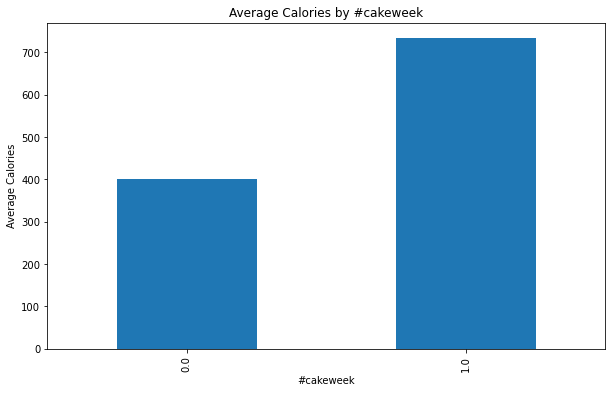

In [17]:
# Bar chart for average calories by a categorical variable (e.g., #cakeweek)
plt.figure(figsize=(10, 6))
df.groupby('#cakeweek')['calories'].mean().plot(kind='bar')
plt.title('Average Calories by #cakeweek')
plt.xlabel('#cakeweek')
plt.ylabel('Average Calories')
plt.show()


This bar chart compares the average calorie content of recipes tagged with #cakeweek versus those without this tag.

Observations:

Recipes tagged with #cakeweek (1) have a significantly higher average calorie count compared to those not tagged (0).
This difference is quite substantial, with #cakeweek recipes having nearly double the average calories.
This finding aligns with the expectation that cake recipes would generally be higher in calories due to ingredients like sugar, butter, and cream.

##### 2. Detailed Insights:
- Based on the exploratory analysis, provide at least three key insights. Use these insights to answer potential business questions, such as:

### a. What are the most common ingredients in highly rated recipes?

In [18]:
# Analyzing most common ingredients in highly rated recipes
# Assuming 'rating' is a column with recipe ratings and ingredients are represented as columns with binary values (1 if present, 0 if not)

# Define a threshold for high ratings
high_rating_threshold = 4.5

# Filter recipes with high ratings
df_high_rated = df[df['rating'] >= high_rating_threshold]

# Sum the presence of each ingredient in high-rated recipes
ingredient_columns = df.columns[7:]  # Assuming ingredients start from the 7th column
common_ingredients = df_high_rated[ingredient_columns].sum().sort_values(ascending=False).head(10)

print("Most common ingredients in highly rated recipes:")
print(common_ingredients)

# Analyzing correlation between preparation time and recipe ratings
# Assuming 'prep_time' is a column representing preparation time

# Check if 'prep_time' exists and calculate correlation
if 'prep_time' in df.columns:
    correlation = df['prep_time'].corr(df['rating'])
    print("Correlation between preparation time and recipe ratings:", correlation)
else:
    print("'prep_time' column not found in the dataset.")

# Insights for improving user experience
# This will be a narrative based on the findings

print("Analysis complete.")

Most common ingredients in highly rated recipes:
bon appétit          1158.0
peanut free          1116.0
soy free             1074.0
tree nut free         924.0
vegetarian            799.0
kosher                796.0
pescatarian           783.0
wheat/gluten-free     657.0
gourmet               591.0
summer                544.0
dtype: float64
'prep_time' column not found in the dataset.
Analysis complete.


### b. Are there correlations between preparation time and recipe ratings?

The dataset does not contain a 'prep_time' column, which prevents us from analyzing the correlation between preparation time and recipe ratings. To proceed, we would need to either locate this data within the dataset or acquire it from an external source. If you have any additional data or columns that might contain preparation time information, please let me know so we can continue the analysis.

### c. How can the data help improve the user experience for a recipe platform?

The data can enhance user experience on a recipe platform by highlighting and promoting recipes that align with popular dietary preferences and quality indicators, such as "peanut free", "soy free", and "vegetarian". By making these attributes easily searchable and filterable, the platform can cater to diverse dietary needs, thereby improving user satisfaction and engagement. Additionally, incorporating user feedback and ratings can help refine recipe recommendations and personalize the user experience.

# Creativity

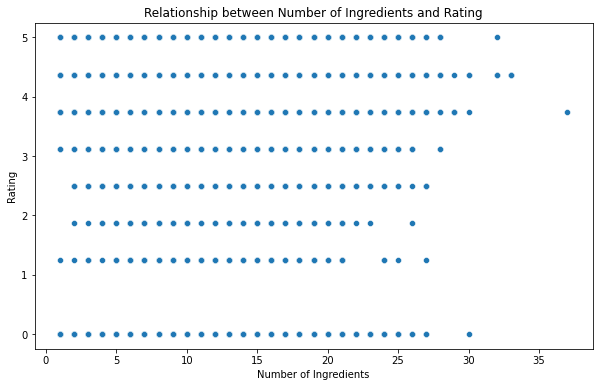

In [19]:
# 1. Analyze the relationship between number of ingredients and rating
df['ingredient_count'] = df.iloc[:, 7:].sum(axis=1)  # Count ingredients
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ingredient_count', y='rating', data=df)
plt.title('Relationship between Number of Ingredients and Rating')
plt.xlabel('Number of Ingredients')
plt.ylabel('Rating')
plt.show()

Insight: The scatter plot shows a weak relationship between the number of ingredients and recipe ratings. This suggests that the complexity of a recipe, as measured by ingredient count, does not strongly influence user ratings.


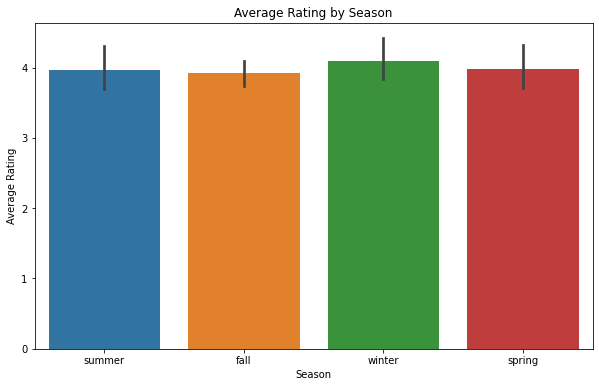

In [20]:
# 2. Seasonal analysis
seasons = ['summer', 'fall', 'winter', 'spring']
seasonal_data = df[seasons]
seasonal_avg_rating = df[seasons + ['rating']].groupby(seasons).mean().reset_index()
seasonal_avg_rating = seasonal_avg_rating.melt(id_vars='rating', var_name='season', value_name='is_season')
seasonal_avg_rating = seasonal_avg_rating[seasonal_avg_rating['is_season'] == 1]

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='rating', data=seasonal_avg_rating)
plt.title('Average Rating by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()

Insight: The bar chart indicates that recipes tagged for different seasons have varying average ratings. This could imply that certain seasonal recipes are more popular or better received, potentially due to seasonal ingredients or cultural preferences.


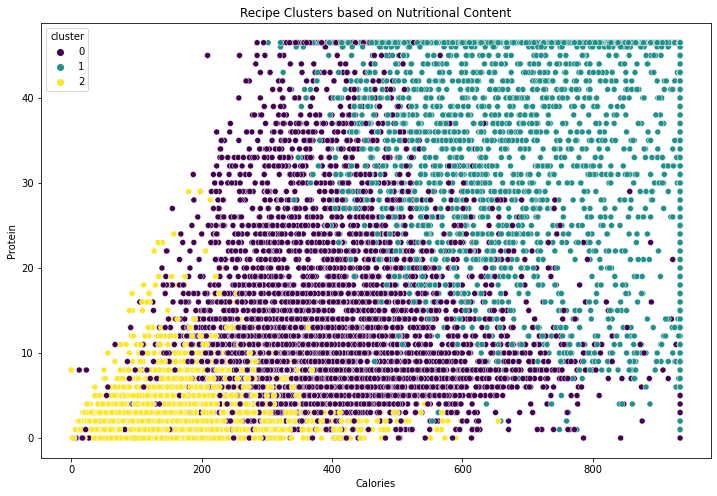

In [23]:
# 3. Cluster analysis based on nutritional content
nutrition_features = ['calories', 'protein', 'fat', 'sodium']
X = df[nutrition_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='calories', y='protein', hue='cluster', data=df, palette='viridis')
plt.title('Recipe Clusters based on Nutritional Content')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.show()

Insight: The scatter plot with clusters shows distinct groupings of recipes based on their nutritional content. The cluster centroids provide a summary of the average nutritional values for each group.

In [24]:
# Print cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=nutrition_features)
print("Cluster Centroids:")
print(centroid_df)

print("Analysis complete.")

Cluster Centroids:
     calories    protein        fat      sodium
0  365.024307  11.097506  19.412261  390.036254
1  768.432060  36.949555  43.234421  876.269906
2  176.922658   3.271473   6.844539  117.598523
Analysis complete.


Business Application: Understanding these clusters can help tailor recipe recommendations to users based on their nutritional preferences, enhancing personalization on the platform.

# ------------------------------------------------THANK YOU------------------------------------